# Analysis on the mutation rates of sars-cov-2


Methods-
Picked specimens from NCBI database and applied their multiple alignmemt algorithm. https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=SARS-CoV-2,%20taxid:2697049

downloaded the alignment and did some data pre processing to compare two alignments. I use the following formula to calculate my mutation rate -
mutation rate i = number of mismatches(sequencei ,sequencej) where j is the date right before i.
I consider mutations as mismatches that is substitution,deletion and insertion is considered as a mutation. The mutation rate is the change in nucleotides between two sequences found in different dates.

after using an algorithm to compute mutation rates, I plot a graph to see the mutation rates as the days progress.


In [1]:
import pandas as pd
sequences = pd.read_csv("sequences.csv")
sequences = sequences.sort_values('Collection_Date')
sequences

,Accession,Release_Date,Species,Length,Geo_Location,Host,Isolation_Source,Collection_Date
19,MT019529,2020-02-05T00:00:00Z,Severe acute respiratory syndrome-related coro...,29899,"China: Hubei, Wuhan",Homo sapiens,lung,2019-12-23
21,LR757995,2020-02-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29872,China:Wuhan,Homo sapiens,NaN,2019-12-26
14,MT291826,2020-04-06T00:00:00Z,Severe acute respiratory syndrome-related coro...,29807,China: Wuhan,Homo sapiens,lung,2019-12-30
22,LR757997,2020-02-01T00:00:00Z,Severe acute respiratory syndrome-related coro...,29388,China:Wuhan,Homo sapiens,NaN,2019-12-31
13,MT326173,2020-04-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,29574,USA,Homo sapiens,NaN,2020
20,MT019533,2020-02-05T00:00:00Z,Severe acute respiratory syndrome-related coro...,29883,"China: Hubei, Wuhan",Homo sapiens,lung,2020-01-01
23,MN938384,2020-01-24T00:00:00Z,Severe acute respiratory syndrome-related coro...,29838,China: Shenzhen,Homo sapiens,oronasopharynx,2020-01-10
16,MT253709,2020-03-27T00:00:00Z,Severe acute respiratory syndrome-related coro...,29781,"China: Zhejiang, Hangzhou",Homo sapiens,"lung, oronasopharynx",2020-01-21
18,MT066156,2020-03-09T00:00:00Z,Severe acute respiratory syndrome-related coro...,29867,Italy,Homo sapiens,"lung, oronasopharynx",2020-01-30
7,MT270106,2020-05-19T00:00:00Z,Severe acute respiratory syndrome-related coro...,29864,Germany: Bavaria,Homo sapiens,NaN,2020-02-01


In [2]:
#mismatches takes in two virus sequence and finds the total mismatches
def mismatches(seq1, seq2):
    miss = 0
    for i in range(len(seq1)):
        if(seq1[i] != 'N' and seq2[i] != 'N'):
            if seq1[i] != seq2[i]:
                miss += 1
            if seq1[i] == "-" and seq2[i] == "-":
                miss += 1
    return miss

#data preprocessing 

#matches the sequence name in the downloaded file to the give sequence name
def findSeq(query, seqNames):
    for i in seqNames:
        if query.find(i) > 0:
            return i
    print("no such sequence found")

#takes in a file with .aln and and cleans up the sequences to strings
def getMutationScores(filename, seqNames):
    file = open(filename, 'r')
    str1 = ""
    cleanSeqs = {}
    for i in file:
        str1 += i
    seqData = str1.strip().split('>')
    seqData = seqData[1:]
    for seq in seqData:
        seqStr = seq.strip().split("\n")
        cleanSeqs[findSeq(seqStr[0], seqNames)] = ("".join(seqStr[1:]))
        #print(len(cleanSeqs[findSeq(seqStr[0], seqNames)]))
    mismatchScores = []
    for i in range(len(seqNames)-1):
        mismatchScores.append(mismatches(
            cleanSeqs[seqNames[i]], cleanSeqs[seqNames[i+1]]))
    return([0] + mismatchScores)

In [3]:
sequences_info = pd.DataFrame(sequences['Accession'],columns = ['Accession'])
sequences_info['date'] = sequences['Collection_Date']

In [4]:
filter = ['MT415375','MT503017']
newSeq = []
for i in sequences['Accession']:
    if i not in filter:
        newSeq.append(i)
scores_1 = getMutationScores('sars-cov19.aln',newSeq)
newSarsCov = pd.DataFrame(newSeq,columns=['Accession'])
newSarsCov['mutation_score'] = scores_1
newSarsCov = pd.merge(newSarsCov,sequences_info,on = 'Accession')
newSarsCov


no such sequence found
no such sequence found


,Accession,mutation_score,date
0,MT019529,0,2019-12-23
1,LR757995,93,2019-12-26
2,MT291826,161,2019-12-30
3,LR757997,671,2019-12-31
4,MT326173,848,2020
5,MT019533,391,2020-01-01
6,MN938384,125,2020-01-10
7,MT253709,181,2020-01-21
8,MT066156,180,2020-01-30
9,MT270106,101,2020-02-01


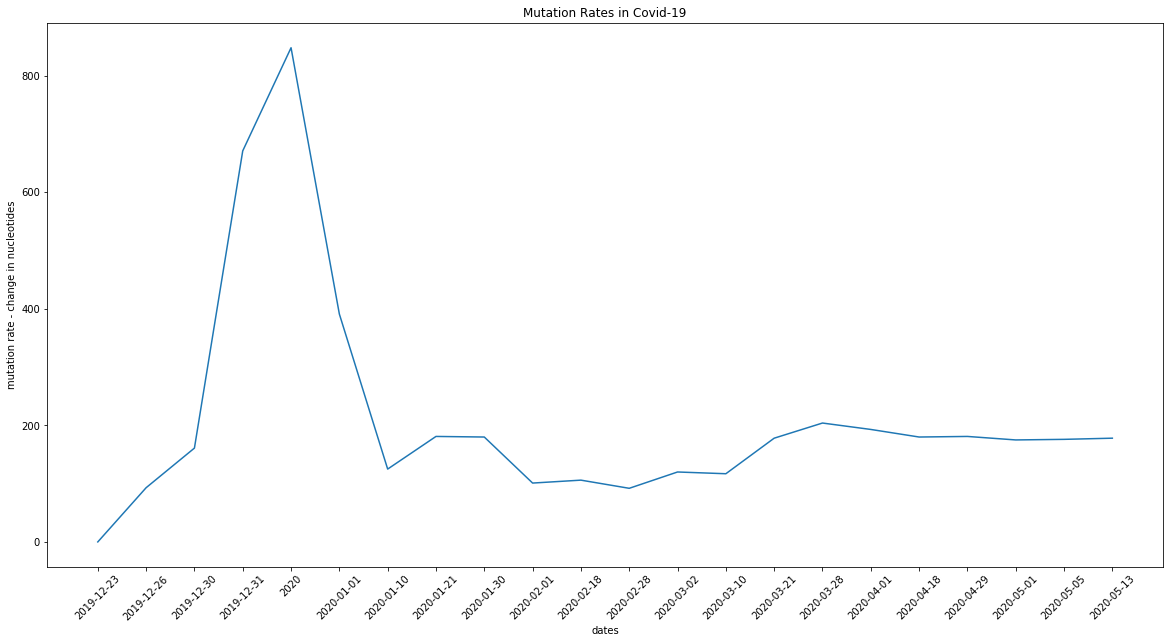

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(newSarsCov['date'],newSarsCov['mutation_score'])
plt.xticks(rotation=45)
plt.xlabel("dates")
plt.ylabel("mutation rate - change in nucleotides")
plt.title("Mutation Rates in Covid-19")
plt.show()